In [266]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import scipy

In [267]:
def potential(x):
    #2*x**2+3*torch.sin(torch.pi*x/2.4)*x*(1-torch.exp(-x/6))
    #x**3/20+torch.sin(torch.pi*x/10)*(20-x)*x+x**2/2
    #-10/x-8*(torch.sin(torch.pi*x/10))**2*torch.exp(-x/15)
    return 2*x*torch.sin(torch.pi*x)+x**2*2

In [268]:
h_bar=1
m=1
b_lap:float=-h_bar**2/(2*m)

# 同时对于库伦势函数, 取e=1, 4\pi\epsilon_0=1, E_n=-1/(2n^2)
dtype=torch.float32
device=torch.device("cuda:5" if torch.cuda.is_available() else "cpu")

mult=1
La=-10
Lb =10
L=Lb-La  # domain length
N = 1000  # number of interior points # 对时间成本来说几乎是平方量级
h :float= L / (N+1)
grid=torch.linspace(La,Lb,N+2,dtype=dtype,device=device)
grid=grid[1:-1].unsqueeze(-1)

# 控制势函数的大小
l_max=8
scale=10

en_num=100
extend_num=10
epoch=200000
lr=0.01

diag = -2.0 / h**2 * torch.ones(N,device=device) * b_lap
off_diag = 1.0 / h**2 * torch.ones(N - 1,device=device) * b_lap

In [269]:
V_diag=potential(grid)
A = torch.diag(diag) + torch.diag(off_diag,diagonal=1) + torch.diag(off_diag, diagonal=-1)+torch.diag(V_diag.flatten())
eigenvalues= torch.linalg.eigvalsh(A)
en=eigenvalues[:en_num]
print("Eigenvalues: \n",en)

Eigenvalues: 
 tensor([  1.4061,   2.8649,   3.8758,   6.0234,   8.3992,  10.8994,  13.5570,
         16.1821,  18.3386,  19.2349,  20.0164,  21.8326,  23.8449,  25.7336,
         27.6896,  29.8151,  32.0548,  34.3602,  36.7249,  39.1447,  41.6036,
         44.0795,  46.5402,  48.9063,  50.7237,  51.3532,  52.1390,  53.9997,
         55.9777,  57.7798,  59.5074,  61.3342,  63.3023,  65.3545,  67.4478,
         69.5768,  71.7486,  73.9649,  76.2208,  78.5101,  80.8280,  83.1706,
         85.5333,  87.9098,  90.2918,  92.6674,  95.0141,  97.2611,  98.8538,
         99.3096, 100.1583, 102.0872, 104.0712, 105.8767, 107.5310, 109.1983,
        110.9988, 112.9164, 114.8902, 116.8873, 118.9051, 120.9520, 123.0333,
        125.1482, 127.2923, 129.4619, 131.6549, 133.8701, 136.1061, 138.3614,
        140.6340, 142.9217, 145.2221, 147.5327, 149.8501, 152.1705, 154.4882,
        156.7950, 159.0743, 161.2673, 162.7863, 163.1499, 163.9812, 165.9353,
        167.9434, 169.7988, 171.4666, 173.0527, 1

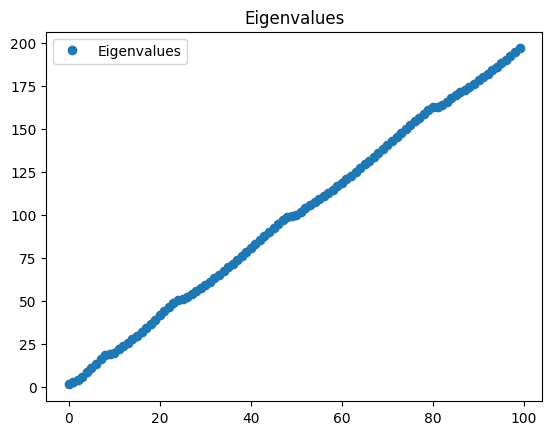

In [270]:
plt.plot(en.cpu(), 'o', label='Eigenvalues')
plt.title("Eigenvalues")
plt.legend()
plt.show()

/tmp/ipykernel_566549/1186928101.py:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


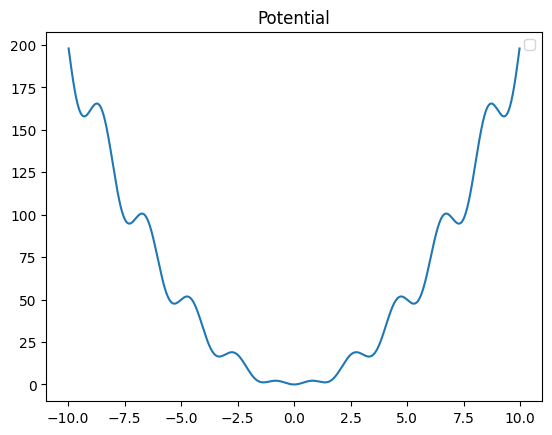

In [271]:
plt.plot(grid.cpu().numpy(),V_diag.cpu().numpy())
plt.title("Potential")
plt.legend()
plt.show()

In [272]:
eigs, eigv = torch.linalg.eigh(A)

# print("Eigenvalues: \n", eigs[:en_num])
# print("Eigenvectors: \n", eigv[:,:en_num])

tensor(1.0000, device='cuda:5')
normalization: tensor(114.8902, device='cuda:5')


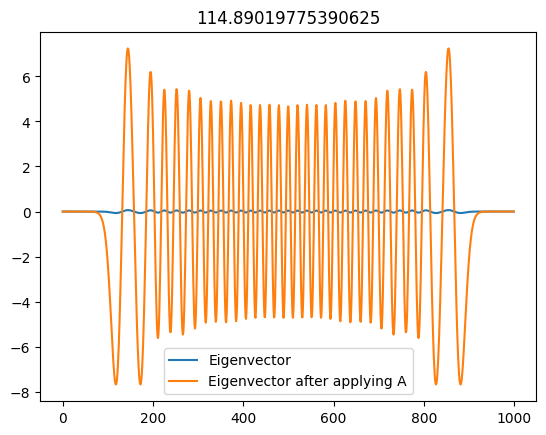

In [273]:
n=58
test_v=eigv[:,n]
test_vt=A@test_v
#归一化test_vt
# norm=torch.norm(test_vt)
# test_vt=test_vt/norm
print(torch.norm(test_v))
norm=torch.norm(test_vt)
print('normalization:',norm)

plt.plot(test_v.detach().cpu().numpy(),label="Eigenvector")
plt.plot(test_vt.detach().cpu().numpy(),label="Eigenvector after applying A")
plt.title(f'{eigs[n]}')
plt.legend()
plt.show()

tensor(1.0000, device='cuda:5')


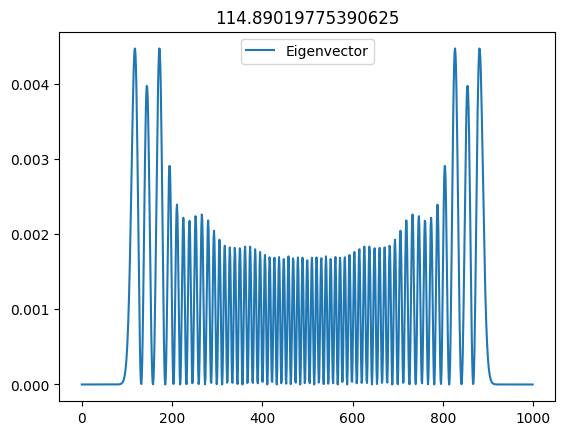

In [274]:
test_v=eigv[:,n]

# r=torch.linspace(La,Lb,N+2,dtype=dtype,device=device)
# R=r[1:-1]
# R=1/R 
# test_v=test_v*R

print(torch.norm(test_v))
test_v=test_v**2
#归一化test_vt
# norm=torch.norm(test_vt)
# test_vt=test_vt/norm



plt.plot(test_v.detach().cpu().numpy(),label="Eigenvector")
plt.title(f'{eigs[n]}')
plt.legend()
plt.show()